In [ ]:
modals = ['t', 'a', 'v', 'ta', 'tv', 'av', 'tav']
pmodes = list(range(0, 9))
seeds = list(range(0, 5))

for seed in seeds:
    for modal in modals:
        for pmode in pmodes:
            cmd = f'python fnn.py --ss --modal {modal} --pmode {pmode}  --seed {seed} --save_results'
            print(cmd)

In [1]:
import pickle 
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import japanize_matplotlib
import statistics
from scipy import stats

version = "1911"
with open(f'../data/Hazumi_features/Hazumi{version}_features.pkl', mode='rb') as f:
    SS_raw, SS_binary, SS_ternary, TS_raw, TS_binary, TS_ternary, SP, TP, Text, Audio, Visual, ID \
        = pickle.load(f, encoding='utf-8')

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix
np.set_printoptions(precision=3)
gender = [[], []]
age = [[], []]
ss_gender = [[], []]
ss_age = [[], []]
ts_gender = [[], []]
ts_age = [[], []]

for id in ID:
    acc = accuracy_score(SS_ternary[id], TS_ternary[id])
    if id[4] == 'F':
        gender[0].append(acc)
        ss_gender[0].extend(SS_ternary[id])
        ts_gender[0].extend(TS_ternary[id])
    else:
        gender[1].append(acc)
        ss_gender[1].extend(SS_ternary[id])
        ts_gender[1].extend(TS_ternary[id])
    if int(id[5]) <= 4:
        age[0].append(acc)
        ss_age[0].extend(SS_ternary[id])
        ts_age[0].extend(TS_ternary[id])
    else:
        age[1].append(acc)
        ss_age[1].extend(SS_ternary[id])
        ts_age[1].extend(TS_ternary[id])

print("女性")
print(sum(gender[0]) / len(gender[0])) 
print(confusion_matrix(ss_gender[0], ts_gender[0]))
# print(confusion_matrix(ss_gender[0], ts_gender[0]) / sum(ss_gender[0]))

print("男性")
print(sum(gender[1]) / len(gender[1])) 
print(confusion_matrix(ss_gender[1], ts_gender[1]))
# print(confusion_matrix(ss_gender[1], ts_gender[1]) / sum(ss_gender[1]))

print("50歳未満")
print(sum(age[0]) / len(age[0]))
print(confusion_matrix(ss_age[0], ts_age[0]))
# print(confusion_matrix(ss_age[0], ts_age[0]) / sum(ss_age[0]))

print("50歳以上")
print(sum(age[1]) / len(age[1]))
print(confusion_matrix(ss_age[1], ts_age[1]))
# print(confusion_matrix(ss_age[1], ts_age[1]) / sum(ss_age[1]))


女性
0.46696310040300787
[[ 45 149 131]
 [ 30 185 247]
 [  6 139 367]]
男性
0.6216860673107604
[[ 38  59  63]
 [ 31 221 134]
 [ 28 128 438]]
50歳未満
0.473285124646936
[[ 34 130 134]
 [ 39 245 250]
 [ 18  79 298]]
50歳以上
0.6034622763816205
[[ 49  78  60]
 [ 22 161 131]
 [ 16 188 507]]


# ユーザ特性グループごとの人数

### 性別と年齢

In [168]:
gender_label = ["女性", "男性"]
age_label = ["20代", "30代", "40代", "50代", "60代", "70代"]
count = [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
for id in ID:
    if id[4] == 'F':
        count[0][int(id[5]) - 2] += 1
    else:
        count[1][int(id[5]) - 2] += 1
count_df = pd.DataFrame(count, index=gender_label, columns=age_label)
count_df

,20代,30代,40代,50代,60代,70代
女性,2,3,3,2,3,1
男性,3,0,2,2,3,2


### 性格特性（標準化前）

In [169]:
c = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
index_label = ["Low", "High"]
column_label = ["外向性", "協調性", "勤勉性", "神経症傾向", "開放性"]
for id in ID:
    for i, tp in enumerate(TP[id]):
        if tp < 7: 
            c[0][i] += 1
        else:
            c[1][i] += 1
c
c_df = pd.DataFrame(c, index=index_label, columns=column_label)
c_df

,外向性,協調性,勤勉性,神経症傾向,開放性
Low,3,1,1,24,3
High,23,25,25,2,23


### 性格特性（標準化後）

In [170]:
c = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
index_label = ["Low", "High"]
column_label = ["外向性", "協調性", "勤勉性", "神経症傾向", "開放性"]
_df = pd.DataFrame.from_dict(TP, orient='index', columns=column_label)
tp_df = (_df - _df.mean() ) / _df.std(ddof=0)
for id in ID:
    for i in range(5):
        tp = tp_df.loc[id, column_label[i]]
        if tp < 0: 
            c[0][i] += 1
        else:
            c[1][i] += 1
c
c_df = pd.DataFrame(c, index=index_label, columns=column_label)
c_df

,外向性,協調性,勤勉性,神経症傾向,開放性
Low,11,12,13,16,12
High,15,14,13,10,14


# 本人心象と第三者心象のデータ数

In [171]:
c_ss = [0, 0, 0]
c_ts = [0 ,0, 0]
for id in ID:
    for ss, ts in zip(SS_raw[id], TS_raw[id]):
        if ss <= 3:
            c_ss[0] += 1
        elif ss == 4:
            c_ss[1] += 1
        else:
            c_ss[2] += 1
        
        if ts < 3.5:
            c_ts[0] += 1
        elif ts <= 4.5:
            c_ts[1] += 1
        else:
            c_ts[2] += 1

print("本人心象 : ", c_ss, sum(c_ss))
print("第三者心象 : ", c_ts, sum(c_ts))

本人心象 :  [485, 848, 1106] 2439
第三者心象 :  [178, 881, 1380] 2439


# 本人心象と第三者心象のバラつき

### 本人心象

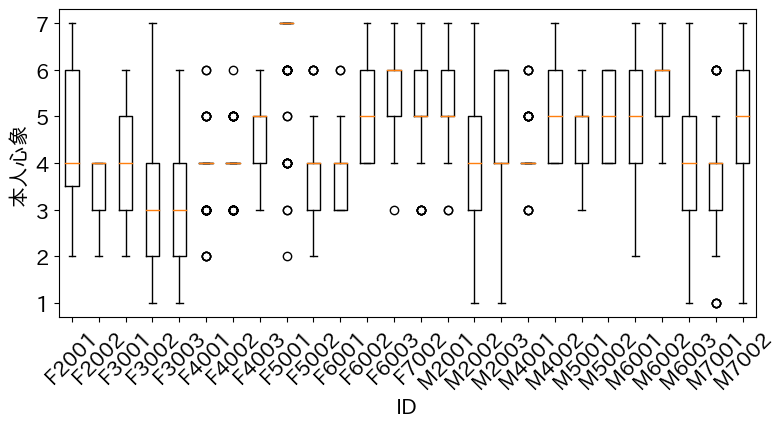

標準偏差:  0.84


In [172]:
SS, ss = [], []
for id in ID:
    SS.append(SS_raw[id])
    ss.append(sum(SS_raw[id]) / len(SS_raw[id]))
fig, ax = plt.subplots(figsize=(9,4)) 
bp = ax.boxplot(SS)
new_ID = []
for id in ID:
    new_ID.append(id[4:])
ax.set_xticklabels(new_ID, rotation=45)
plt.xlabel("ID")
plt.ylabel("本人心象")
plt.show()
print("標準偏差: ", round(statistics.pstdev(ss), 2))

### 第三者心象

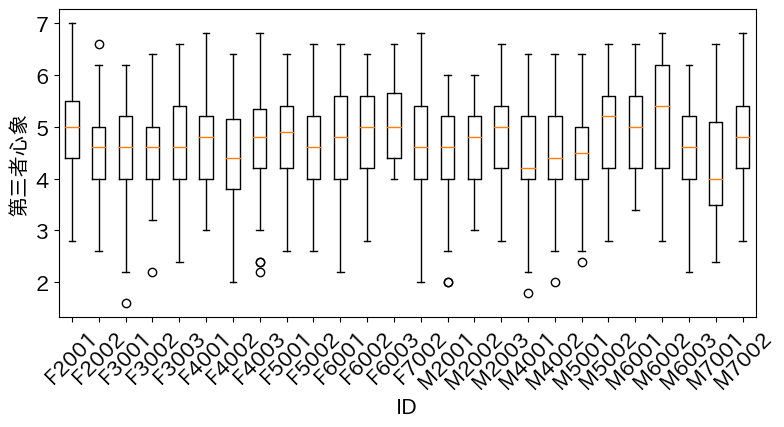

標準偏差:  0.22


In [173]:
TS, ts = [], []
for id in ID:
    TS.append(TS_raw[id])
    ts.append(sum(TS_raw[id]) / len(TS_raw[id]))
fig, ax = plt.subplots(figsize=(9,4)) 
bp = ax.boxplot(TS)
new_ID = []
for id in ID:
    new_ID.append(id[4:])
ax.set_xticklabels(new_ID, rotation=45)
# ax.set_xticklabels(ID, rotation=45)
plt.xlabel("ID")
plt.ylabel("第三者心象")
plt.show()
print("標準偏差: ", round(statistics.pstdev(ts), 2))

# 各ユーザ特性と心象の関係

### 全体

In [174]:
ss = []
for id in ID:
    ss.append(sum(SS_raw[id]) / len(SS_raw[id]))

print("平均: (all)", statistics.mean(ss))
print("標準偏差: (all)", statistics.pstdev(ss))

平均: (all) 4.495338670433066
標準偏差: (all) 0.835223100593629


### 性別

In [175]:
f = []
m = []
for id in ID:
    if id[4] == 'F':
        f.append(sum(SS_raw[id]) / len(SS_raw[id]))
    else:
        m.append(sum(SS_raw[id]) / len(SS_raw[id]))

print("平均: (female)", statistics.mean(f))
print("標準偏差: (female)", statistics.pstdev(f))
print("平均: (male)", statistics.mean(m))
print("標準偏差: (male)", statistics.pstdev(m))

A= np.array(f)
B = np.array(m)

stats.ttest_ind(A, B, equal_var=False)

平均: (female) 4.35962027821899
標準偏差: (female) 0.9768729068108434
平均: (male) 4.653676794682821
標準偏差: (male) 0.5929365178328946


Ttest_indResult(statistic=-0.9058943850659903, pvalue=0.374859005522701)

### 年齢

In [176]:
y = []
o = []
for id in ID:
    if int(id[5]) <= 4:
        y.append(sum(SS_raw[id]) / len(SS_raw[id]))
    else:
        o.append(sum(SS_raw[id]) / len(SS_raw[id]))

print("平均: (young)", statistics.mean(y))
print("標準偏差: (young)", statistics.pstdev(y))
print("平均: (old)", statistics.mean(o))
print("標準偏差: (old)", statistics.pstdev(o))

A= np.array(y)
B = np.array(o)

stats.ttest_ind(A, B, equal_var=False)

平均: (young) 4.112285826768333
標準偏差: (young) 0.6270222730135586
平均: (old) 4.878391514097799
標準偏差: (old) 0.8417715620024858


Ttest_indResult(statistic=-2.5283691424725174, pvalue=0.019072628677694176)

### 性格特性

In [177]:
columns = ['E', 'A', 'C', 'N', 'O']
_df = pd.DataFrame.from_dict(TP, orient='index', columns=columns)
tp = (_df - _df.mean() ) / _df.std(ddof=0)

In [178]:
# 外向性
l = []
h = []
for id in ID:
    if tp.loc[id]['E'] < 0:
        l.append(sum(SS_raw[id]) / len(SS_raw[id]))
    else:
        h.append(sum(SS_raw[id]) / len(SS_raw[id]))

print("平均: (Low)", statistics.mean(l))
print("標準偏差: (Low)", statistics.pstdev(l))
print("平均: (High)", statistics.mean(h))
print("標準偏差: (High)", statistics.pstdev(h))

A= np.array(l)
B = np.array(h)

stats.ttest_ind(A, B, equal_var=False)

平均: (young) 3.9811653023671605
標準偏差: (young) 0.5579143811712098
平均: (old) 4.872399140348063
標準偏差: (old) 0.8030296612082496


Ttest_indResult(statistic=-3.2078693901319357, pvalue=0.0037704841983342047)

In [187]:
# 協調性
l = []
h = []
for id in ID:
    if tp.loc[id]['A'] < 0:
        l.append(sum(SS_raw[id]) / len(SS_raw[id]))
    else:
        h.append(sum(SS_raw[id]) / len(SS_raw[id]))

print("平均: (Low)", statistics.mean(l))
print("標準偏差: (Low)", statistics.pstdev(l))
print("平均: (High)", statistics.mean(h))
print("標準偏差: (High)", statistics.pstdev(h))

A= np.array(l)
B = np.array(h)

stats.ttest_ind(A, B, equal_var=False)

平均: (Low) 4.319697215497413
標準偏差: (Low) 0.7312809510913526
平均: (High) 4.645888488949339
標準偏差: (High) 0.8877243720591885


Ttest_indResult(statistic=-0.9869406324248576, pvalue=0.33352479693682724)

In [188]:
# 勤勉性
l = []
h = []
for id in ID:
    if tp.loc[id]['C'] < 0:
        l.append(sum(SS_raw[id]) / len(SS_raw[id]))
    else:
        h.append(sum(SS_raw[id]) / len(SS_raw[id]))

print("平均: (Low)", statistics.mean(l))
print("標準偏差: (Low)", statistics.pstdev(l))
print("平均: (High)", statistics.mean(h))
print("標準偏差: (High)", statistics.pstdev(h))

A= np.array(l)
B = np.array(h)

stats.ttest_ind(A, B, equal_var=False)

平均: (Low) 4.403041386433939
標準偏差: (Low) 0.6893970362187074
平均: (High) 4.5876359544321925
標準偏差: (High) 0.9502049277477476


Ttest_indResult(statistic=-0.5447033992654429, pvalue=0.5914635722015389)

In [189]:
# 神経症傾向
l = []
h = []
for id in ID:
    if tp.loc[id]['N'] < 0:
        l.append(sum(SS_raw[id]) / len(SS_raw[id]))
    else:
        h.append(sum(SS_raw[id]) / len(SS_raw[id]))

print("平均: (Low)", statistics.mean(l))
print("標準偏差: (Low)", statistics.pstdev(l))
print("平均: (High)", statistics.mean(h))
print("標準偏差: (High)", statistics.pstdev(h))

A= np.array(l)
B = np.array(h)

stats.ttest_ind(A, B, equal_var=False)


平均: (Low) 4.689727213376145
標準偏差: (Low) 0.8076530522112717
平均: (High) 4.184317001724139
標準偏差: (High) 0.7828631939139685


Ttest_indResult(statistic=1.5130137170477145, pvalue=0.14638516281665231)

In [190]:
# 開放性
l = []
h = []
for id in ID:
    if tp.loc[id]['O'] < 0:
        l.append(sum(SS_raw[id]) / len(SS_raw[id]))
    else:
        h.append(sum(SS_raw[id]) / len(SS_raw[id]))

print("平均: (Low)", statistics.mean(l))
print("標準偏差: (Low)", statistics.pstdev(l))
print("平均: (High)", statistics.mean(h))
print("標準偏差: (High)", statistics.pstdev(h))

A= np.array(l)
B = np.array(h)

stats.ttest_ind(A, B, equal_var=False)


平均: (Low) 4.218175123307026
標準偏差: (Low) 0.7020883723741145
平均: (High) 4.732907425112528
標準偏差: (High) 0.8664550504933368


Ttest_indResult(statistic=-1.6072737650473423, pvalue=0.12109630971029527)